# largest data

<h2>data sample</h2>

In [2]:
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import fontManager
from collections import Counter

path = "../datasets.jsonl"
font_path = "../TaipeiSansTCBeta-Regular.ttf"

fontManager.addfont(font_path)
mpl.rc('font', family='Taipei Sans TC Beta')

o_dataset = []
with open(path, "r") as f: #游標位置會變
    line_count = 0
    for line in f:
      line_count += 1
    f.seek(0) #讓游標讀取位置回到原點
    for i in range(line_count):
        line = f.readline()
        data = json.loads(line)
        o_dataset.append(data)
print(o_dataset[:2])

o_topic = []
path = "../topics.jsonl"

with open(path, "r") as f: #游標位置會變
    line_count = 0
    for line in f:
      line_count += 1
    f.seek(0) #讓游標讀取位置回到原點
    for i in range(line_count):
        line = f.readline()
        data = json.loads(line)
        o_topic.append(data)
print(o_topic[0])

o_project = []
path = "../projects.jsonl"

with open(path, "r") as f: #游標位置會變
    line_count = 0
    for line in f:
      line_count += 1
    f.seek(0) #讓游標讀取位置回到原點
    for i in range(line_count):
        line = f.readline()
        data = json.loads(line)
        o_project.append(data)
print(o_project[0])

[{'author': '蔡韋漢', 'author_email': None, 'contact_email': 'hank89520@gmail.com', 'contact_person': '蔡韋漢', 'created_time': '2023-08-08', 'creator_user_id': 'b463adf3-d71e-4c46-abe0-016a72eac751', 'data_type': ['archive'], 'end_time': '2023-08-08', 'groups': [], 'id': 'f7cc490c-df6d-4c74-85e6-da3af9f7dc38', 'isopen': True, 'keywords': ['Q64481569'], 'language': ['zho'], 'license_id': 'pd', 'license_title': 'Public Domain', 'license_url': 'https://creativecommons.org/publicdomain/mark/1.0/', 'maintainer': None, 'maintainer_email': None, 'metadata_created': '2023-08-08T07:00:16.070724', 'metadata_modified': '2023-08-08T07:01:58.168807', 'name': '50fa6', 'notes': '', 'num_resources': 1, 'num_tags': 1, 'organization': None, 'private': False, 'process_step': '', 'relationships_as_object': [], 'relationships_as_subject': [], 'remarks': '', 'resources': [{'cache_last_updated': None, 'cache_url': None, 'created': '2023-08-08T07:01:54.950611', 'datastore_active': False, 'datastore_contains_all_re

<h1> largest author</h1>
<p></p>

[('高雄市政府水利局、科進栢誠工程顧問股份有限公司', 117), ('中央研究院人社中心GIS專題中心：台灣歷史文化地圖', 116), ('嘉義縣政府', 99), ('6456', 95), ('逢甲大學水利發展中心', 77), ('6458', 63), ('逢甲大學', 44), ('磐誠工程顧問股份有限公司', 44), ('samson', 37), ('Linda Chang', 37)]


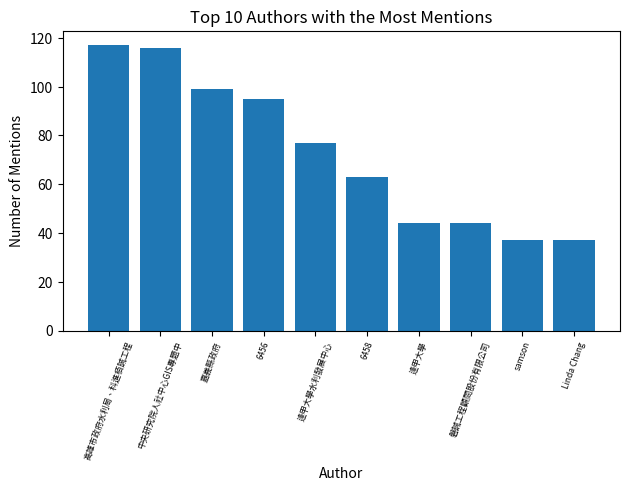

In [3]:
author = []
for i in o_dataset[:-1]: # 最後一個沒有作者
  author.append(i['author'])
author_counts = Counter(author)

top_authors = author_counts.most_common(10)
print(top_authors)
top_authors_names = [i[0][:15] for i in top_authors]
top_authors_mentions = [i[1] for i in top_authors]


plt.bar(top_authors_names, top_authors_mentions)
plt.xlabel('Author')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=70,fontsize=6)
plt.tight_layout()
plt.title('Top 10 Authors with the Most Mentions')

plt.show()
# 可以再做一個比例圓餅圖
## 得知現在的作者有誰

<h1>Largest tags : </h1>

<p>秀出被使用最多次的tag還有使用次數</p>

In [ ]:
url = "http://data.depositar.io/api/3/action/package_search?facet.field=[%22tags%22]&facet.limit=10"
package_list = requests.get(url).json()

tag_number =  package_list['result']['facets']['tags']
values = tag_number.values()
labels = tag_number.keys()
print(tag_number)
plt.bar(labels, values)
plt.xlabel('Categories')
plt.ylabel('Package Count')
plt.title('Bar Graph: Package Count by Category')
plt.xticks(rotation=45, ha='right')  # To rotate the labels for better readability
plt.tight_layout()  # To prevent label cutoff
plt.show()


<h1> largest topics</h1>
<br>#include tags也做得到
<br>#Returning a list of packages is too expensive, 要顯現出該topic有什麼資料集是做不到的事情

In [ ]:

unsort_topic = []
for i in o_topic:
  unsort_topic.append({'name': i['name'], 'package_count': i['package_count']})

topic = sorted(unsort_topic, key=lambda x: x['package_count'],reverse=True)
values = [item['package_count'] for item in topic[:10]]
labels = [item['name'] for item in topic[:10]]
print(topic)

plt.bar(labels, values)
plt.xlabel('Categories')
plt.ylabel('Package Count')
plt.title('Bar Graph: Package Count by Category')
plt.xticks(rotation=45, ha='right')  # To rotate the labels for better readability
plt.tight_layout()  # To prevent label cutoff
plt.show()



<h1>largest type</h1>
<br> problem of undefined needs to be solved <br>

In [ ]:
types = []

for j in o_dataset:
  if j['resources']:
      if j['resources'][0]['format']=='':
        types.append('undefined')
      elif j['resources'][0]['format']==".pdf":
        types.append('PDF')
      else:
        types.append(j['resources'][0]['format'])
  else:
      types.append('lost')

type_counts = Counter(types)
all_top_type = type_counts.most_common(120)
top_type = type_counts.most_common(10)

print(all_top_type)
all_top_type_mentions = [i[1] for i in all_top_type]
print(sum(all_top_type_mentions))

top_name = [i[0] for i in top_type]
top_type_mentions = [i[1] for i in top_type]

plt.bar(top_name, top_type_mentions)
plt.xlabel('type')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=30,fontsize=8)
plt.tight_layout()
plt.title('Top types with the Most Mentions')

plt.show()

<h1>largest project</h1>
<p></p>

In [ ]:
count_pro = 0
top_project = []

for i in o_project:
  count_pro += 1
  top_project.append({'display_name':i['display_name'],'packages':i['package_count']})

sort_project = sorted(top_project,key=lambda x:x['packages'],reverse=True)
pro_values = [i['packages']for i in sort_project[:10]]
pro_labels = [i['display_name'][:15] for i in sort_project[:10]]
print(sort_project[:10])
plt.bar(pro_labels,pro_values )
plt.xlabel('type')
plt.ylabel('Number of project')
plt.xticks(rotation=80,fontsize=8)
plt.tight_layout()
plt.title('Top projects ')

plt.show()